# Rolling (Changing) Dice

In this notebook, we will analyze and solve the FiveThirtyEight Riddler problem from Mar 27, 2020:

https://fivethirtyeight.com/features/can-you-get-the-gloves-out-of-the-box/



----

From the site:

**You start with a fair 6-sided die and roll it six times, recording the results of each roll. You then write these numbers on the six faces of another, unlabeled fair die. For example, if your six rolls were 3, 5, 3, 6, 1 and 2, then your second die wouldn’t have a 4 on it; instead, it would have two 3s.**

**Next, you roll this second die six times. You take those six numbers and write them on the faces of yet another fair die, and you continue this process of generating a new die from the previous one.**

**Eventually, you’ll have a die with the same number on all six faces. What is the average number of rolls it will take to reach this state?**

**Extra credit: Instead of a standard 6-sided die, suppose you have an N-sided die, whose sides are numbered from 1 to N. What is the average number of rolls it would take until all N sides show the same number?**



# Overview

To answer the above question(s), we solve this a few different ways. First, we simulate the dice rolling and approximate the solution from the simulations. Second, we solve by hand the case of N=3. Last, we implement the manual solution in Python to enable solving for higher values of N.

## Simulation

In [1]:
import pandas as pd
import numpy as np

A helper function:

In [2]:
def roll_dice(dice_counts):
    """
    Simulate rolling a dice. Returns N samples from die as a np array, 
    where N is the number of sides in the original dice.
    """
    return np.random.choice(dice_counts, len(dice_counts))
  


In [3]:
# Test
print(roll_dice([1,2,3]))

[1 1 2]


### Simulate
First, we create a function to do the simulation

In [4]:
def simulate(dice_to_simulate = [1,2,3,4,5,6], num_iterations = 10000):
    result = []
    for i in range(num_iterations):
        dice = dice_to_simulate
        roll_count = 0
        # while the number of distinct values on the dice is >1

        while len(np.unique(dice)) > 1:
            roll_count = roll_count + 1
            dice = roll_dice(dice)
        result.append(roll_count)
    return result

Next, we perform the actual simulation:

In [5]:
%%time 
sim_result = simulate()
print("The average number of rolls needed by simulation: " + str(np.mean(sim_result)))

The average number of rolls needed by simulation: 9.6344
CPU times: user 2.42 s, sys: 9.47 ms, total: 2.43 s
Wall time: 2.45 s


Just for fun, we plot results:

In [6]:
import matplotlib.pyplot as plt
plt.hist(sim_result,bins=max(sim_result),normed=True)
plt.show()

Last, we plot N and the simulated result for N:

2 2.0043
3 3.8933
4 5.7998
5 7.7116
6 9.6793
7 11.6025
8 13.6235
9 15.7277
10 17.4513
11 19.3492
12 21.3688
13 23.1285
14 25.4253


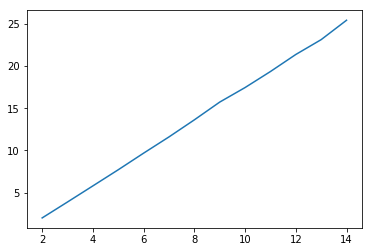

In [7]:
result_by_N_sim = []
for N in np.arange(2,15):
    sim_result = simulate(dice_to_simulate = list(np.arange(N)+1))
    print(str(N) + " " + str(np.mean(sim_result)))
    result_by_N_sim.append([N,np.mean(sim_result)])
plt.plot(np.array(result_by_N_sim).T[0],np.array(result_by_N_sim).T[1])
plt.show()

In [8]:
np.array(result_by_N_sim)

array([[ 2.    ,  2.0043],
       [ 3.    ,  3.8933],
       [ 4.    ,  5.7998],
       [ 5.    ,  7.7116],
       [ 6.    ,  9.6793],
       [ 7.    , 11.6025],
       [ 8.    , 13.6235],
       [ 9.    , 15.7277],
       [10.    , 17.4513],
       [11.    , 19.3492],
       [12.    , 21.3688],
       [13.    , 23.1285],
       [14.    , 25.4253]])

### Manual Calculation for N=3
#### Observations and Notation
Next, we calculate for the N=3 case manually. First, note that there are 27 possible rolls:

* (1,1,1)
* (1,1,2)
* (1,1,3)
* (1,2,1)
...
* (3,2,3)
* (3,3,1)
* (3,3,2)
* (3,3,3)

There are a few important observations that will help us:

* We use $E(x)$ to denote the expected the number of rolls needed for a the dice x to converge on 1 number.
* E[(1,1,1)] = 0 , since the dice has already converged.
* E[(2,2,2)] = E[(1,1,1)] since both dice have already converged.
* E[(1,1,2)] = E[(1,2,2)] since both dice have 2 instances of one number and one instance of another number.

The last observation is important, and leads us to a new notation to simplify the work. The new notation is counts of instances of each number, sorted. So (1,1,1) -> (3,0,0) since '1' shows up three times. Similarly, (2,2,2) -> (3,0,0). This annotation maps all dice with the same expected number of rolls ($E$) to the same value!

The rest of this section will use the NEW notation.

#### Calculating N=3

For N=3, we start with a dice of (1,1,1). Remember that this means that we have one count of each number (so one one, one two and one three). The possible rolls for this dice are:

* (3,0,0)
* (2,1,0)
* (1,1,1)

Using this, we come to the equation that will give us the answer:

$$E[(1,1,1)] = P[(1,1,1)]E[(1,1,1)]+P[(3,0,0)]E[(3,0,0)]+P[(2,1,0)]E[(2,1,0)]+1$$

Solving for $E[(1,1,1)]$ will provide us the expected number of rolls to get to a converged die.

#### Calculating Probabilities

We can calculate their probabilities a few ways, but since the counts are small we will do it manually. 

The first case of (3,0,0) is all the number are the same. There are only 3 outcomes that achieve this (all 1's is one of them).

The third case is all different and there are 6 cases that achieve this. (1,2,3) is one of them, but permutations also count including (1,3,2).

The remaining 18/27 cases are the middle scenario, giving probabilities of:

| Outcome | Probability   |
|------|------|
|  (3,0,0) | 3/27|
|  (2,1,0) | 18/27|
|  (1,1,1) | 6/27|

#### Calculating Expected Values
Next, we calculate $E(x)$ for each of the three cases.

The first case is easy since (3,0,0) indicated the dice has already converged and $E[(3,0,0)] = 0$.

The third case is what we are solving for, so we will combine this with what's on the left hand side and simplify.

The (2,1,0) case needs further consideration. This case is instances of one number appearing twice on the dice and another number appearing once. So, the possible outcomes are

* (3,0,0)
* (2,1,0)

Of the 27 possibilities (3 options for each of three rolls is 3*3*3=27), 9 are the first case. Since $E(3,0,0)=0$, this term drops out.

The other 18 are from the second case. We add one to include having to roll again to obtain these states. From this, we obtain:

$$E[(2,1,0)] = P[(2,1,0)]E[(2,1,0)]+P[(3,0,0)]E[(3,0,0)]+1$$
$$ = \frac{18}{27}E[(2,1,0)]+1$$

This implies

$$E[(2,1,0)] = 3$$

Plugging all this back into the equation above:

$$E[(1,1,1)] = P[(1,1,1)]E[(1,1,1)]+P[(3,0,0)]E[(3,0,0)]+P[(2,1,0)]E[(2,1,0)]+1$$
Removing the (3,0,0) term since that equals 1, we obtain
$$E[(1,1,1)] = \frac{6}{27}E[(1,1,1)]+\frac{18}{27}3+1$$

Joining the terms and simplifying, we get:

$$E[(1,1,1)] = \frac{27}{7} \approx 3.857$$

This aligns well with our simulation result for N=3 of 3.821


# Coding the Solution

We take advantage of a few items to code the solution

1) We know that $E[(3,0,0)]=0$
2) We can calculate the probability of each possible P[x] by counting the possible outcomes
3) If we create the equation for each possible outcome (in the converted annotation system), then we can convert to a solveable linear algebra problem of the form $Ax=b$ where $A$ are the probabilistic weights in each equation, $x$ is $E[x]$ and b is some constant that is derivable with minimal algebra.

### We start with some helper functions
* convert_to_count : Converts a dice from its raw numbers to its converted values. 
  * e.g. [1,1,2] -> [2,1,0]
* convert_to_example_raw : Converts a dice from its converted values to an example raw die. 
  * e.g. [2,1,0] -> [1,1,2]
* print_possible_rolls : Creates an array of all possible rolls of length N (using the raw format) from a given die of length N. 
  * e.g. [1,2] -> [[1,1],[1,2],[2,1],[2,2]]

In [9]:
def convert_to_count(dice):
    out_dice = []
    for i in range(len(dice)):
        out_dice.append(sum(np.array(dice)==i+1))
    #print(out_dice)
    
    # return in descending sorted order
    
    #return tuple(np.sort(out_dice)[::-1])
    return tuple(sorted(out_dice)[::-1])

print(convert_to_count([1,1,2,3]))


(2, 1, 1, 0)


In [10]:
def convert_to_example_raw(dice):
    out_dice = []
    for i in range(len(dice)):
        #print("i"+ str(i))
        for ct in range(dice[i]):
            #print(i+1)
            out_dice.append(i+1)
    return out_dice


# A test / example
print(convert_to_example_raw([2,1,0]))

[1, 1, 2]


In [11]:
from itertools import product
# from itertools import permutations

# the second argument can be however
                                            # many die you want to roll.

def print_possible_rolls(dice):
    outcomes = list(product(dice, repeat=len(dice))) 
    return outcomes


# A test / example
poss_vals = print_possible_rolls([1,2,3])
print("Possible rolls: " + str(poss_vals))
poss_conv_vals = [convert_to_count(i) for i in poss_vals]
print("Possible rols converted: " + str(poss_conv_vals))

Possible rolls: [(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 1), (3, 3, 2), (3, 3, 3)]
Possible rols converted: [(3, 0, 0), (2, 1, 0), (2, 1, 0), (2, 1, 0), (2, 1, 0), (1, 1, 1), (2, 1, 0), (1, 1, 1), (2, 1, 0), (2, 1, 0), (2, 1, 0), (1, 1, 1), (2, 1, 0), (3, 0, 0), (2, 1, 0), (1, 1, 1), (2, 1, 0), (2, 1, 0), (2, 1, 0), (1, 1, 1), (2, 1, 0), (1, 1, 1), (2, 1, 0), (2, 1, 0), (2, 1, 0), (2, 1, 0), (3, 0, 0)]


### Our Final Function

Finally, we have a helper function that takes the dice size and outputs all possible $[x, E[x]]$ pairs for the die.

Pseudocode:
* Identify all possible rolls and (more importantly) all possible converted rolls.
* for each possible converted roll:
  * if the roll is solve (e.g. [4,0,0,0]) then return E(x)=0.
  * Else:
    * calculate the possible converted outcomes for the 1st converted roll
    * For all possible converted outcomes, calculate the probability of that happening by (# occurances)/(N^N)
    * If the possible converted outcome == first roll then subtract 1 (to account for having to move the '+1' over)
    * Add the weights to A and the calculated value (always -1 since we didn't scale) to B
* Calculate $Ax=B$ for x since x is our expectation

This returns $E[(x)]$ for all x. If you only want the starting expectation then look for the die with all ones (or take the max $E[(x)]$ from the list)

In [12]:
import time

In [13]:
def calculate_probs(dice_size):
    start_time = time.time()
    poss_rolls = print_possible_rolls(np.array([i+1 for i in range(dice_size)]))
    # print(poss_rolls)
    poss_conv_vals = [convert_to_count(i) for i in poss_rolls]
    # print(poss_conv_vals)

    uniq_global_poss_conv_vals = list(set(poss_conv_vals))
    #print(uniq_poss_conv_vals)

    # initialize variable
    A = []
    B = []

    #print("entering first loop: " + str(time.time() - start_time))
    for val in uniq_global_poss_conv_vals:
        if val[0] == len(val): # e.g. (3,0,0), then this is solved
            #A.append(list(val))
            new_row = []
            for outcome in uniq_global_poss_conv_vals:
                if outcome == val:
                    new_row.append(1)
                else:
                    new_row.append(0)
            A.append(new_row)
            B.append(0) # already solved so 0 more rolls needed
        else:  # e.g. (2,1,0) - need to document
            #poss_outcomes = print_possible_rolls(np.array([i+1 for i in range(dice_size)]))
            poss_outcomes = print_possible_rolls(convert_to_example_raw(val))
            # convert_to_example_raw
            poss_conv_outcomes = [convert_to_count(i) for i in poss_outcomes]
            new_row = []
            new_result = -1
            for outcome in uniq_global_poss_conv_vals:
                # first get the likelihood of rolling this outcome
                val_to_add = poss_conv_outcomes.count(outcome)/float(len(poss_conv_outcomes))
                # then subtract 1 if this the same as val to account for algebra needed
                if outcome == val:
                    val_to_add = val_to_add - 1
                new_row.append(val_to_add)
            A.append(new_row)
            B.append(new_result)

    # Now solve us Ax = B
    x = np.linalg.solve(A, B)
    
    # Return as a pd dataframe the number of rolls needed for each converted combination of die
    return pd.DataFrame([a for a in zip(uniq_global_poss_conv_vals, x)])


In [14]:
%%time
# Normally takes a little under a minute to solve the N=6 Case

# We see (1, 1, 1, 1, 1, 1)	is 9.655991

calculate_probs(6)

CPU times: user 56.2 s, sys: 231 ms, total: 56.4 s
Wall time: 57.3 s


,0,1
0,"(4, 1, 1, 0, 0, 0)",6.962615
1,"(2, 1, 1, 1, 1, 0)",9.278217
2,"(3, 3, 0, 0, 0, 0)",7.205028
3,"(3, 2, 1, 0, 0, 0)",8.052735
4,"(2, 2, 2, 0, 0, 0)",8.522669
5,"(4, 2, 0, 0, 0, 0)",6.584840
6,"(2, 2, 1, 1, 0, 0)",8.900443
7,"(6, 0, 0, 0, 0, 0)",0.000000
8,"(1, 1, 1, 1, 1, 1)",9.655991
9,"(5, 1, 0, 0, 0, 0)",4.623001


We'll iterate over different values of N and calculate the probability

In [16]:
result_by_N_calc = []
start_time = time.time()
for N in np.arange(2,7):
    prob = calculate_probs(N)
    print("N=" + str(N) + " Average: " + str(np.max(prob[1])) + "\nIn cumulative time: "  + str(time.time() - start_time))
    result_by_N_calc.append([N,np.max(prob[1])])
#plt.plot(np.array(result_by_N).T[0],np.array(result_by_N).T[1])
#plt.show()

N=2 Average: 2.0
In cumulative time: 0.001360177993774414
N=3 Average: 3.8571428571428563
In cumulative time: 0.008723974227905273
N=4 Average: 5.779310344827586
In cumulative time: 0.09117698669433594
N=5 Average: 7.711981680697186
In cumulative time: 1.8641388416290283
N=6 Average: 9.65599148388557
In cumulative time: 59.718831062316895


Finally, let's compare the simulations to the actuals:

In [17]:
calc_table = pd.DataFrame(result_by_N_calc,columns=['N','Calculated # of Rolls'])
sim_table = pd.DataFrame(result_by_N_sim,columns=['N','Simulated # of Rolls'])
joined_table = calc_table.merge(sim_table,on = 'N')
joined_table['Error'] = joined_table['Calculated # of Rolls']  - joined_table['Simulated # of Rolls'] 
joined_table['Error %'] = np.abs(joined_table['Error']  / joined_table['Calculated # of Rolls'] ) * 100

joined_table

,N,Calculated # of Rolls,Simulated # of Rolls,Error,Error %
0,2,2.000000,2.0043,-0.004300,0.215000
1,3,3.857143,3.8933,-0.036157,0.937407
2,4,5.779310,5.7998,-0.020490,0.354535
3,5,7.711982,7.7116,0.000382,0.004949
4,6,9.655991,9.6793,-0.023309,0.241389



All the simulation errors are less than 1% off from the calculation!

## Shortcomings

As you can tell from the time taken, the above doesn't seem to scale very well :/ Calculating for N>6 will take too long, so we stopped there.

There is likely a smarter and more scalable way to calculate, but we leave it here for now.